In [0]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
import numpy as np
import torchvision
import torchvision.transforms as transforms

import matplotlib.pyplot as plt
%matplotlib inline

Dataset can be downloaded from

https://drive.google.com/file/d/1_eusbia7KFTq5bLLB189s7GKfA1NIW-V/view



In [2]:
from zipfile import ZipFile 
  
# specifying the zip file name 
file_name = 'drive/My Drive/data_pokemon.zip'
  
# opening the zip file in READ mode 
with ZipFile(file_name, 'r') as zip: 
    # printing all the contents of the zip file 
    zip.printdir() 
  
    # extracting all the files 
    print('Extracting all the files now...') 
    zip.extractall() 
    print('Done!') 

File Name                                             Modified             Size
dataset/                                       2020-03-12 18:46:14            0
dataset/Froakie/                               2020-03-26 10:21:16            0
dataset/Froakie/00000208.png                   2020-03-12 17:39:32        32157
dataset/Froakie/00000182.jpg                   2020-03-12 17:39:12       268814
dataset/Froakie/00000251.png                   2020-03-12 17:40:36       915103
dataset/Froakie/00000300.jpg                   2020-03-12 17:40:54        50732
dataset/Froakie/00000443.png                   2020-03-12 17:41:44       152281
dataset/Froakie/00000398.jpg                   2020-03-12 17:41:32        39742
dataset/Froakie/00000566.png                   2020-03-12 17:42:24      1242779
dataset/Froakie/00000207.jpg                   2020-03-12 17:39:32       552057
dataset/Froakie/00000101.png                   2020-03-12 17:38:32       949036
dataset/Froakie/00000535.jpg            

In [3]:
def load_dataset(data_path):
    #data_path = 'data/train/'
    
    train_dataset = torchvision.datasets.ImageFolder(
        root=data_path,
        transform=transforms.Compose([transforms.Resize(size=(128,128)),
                                      transforms.ToTensor(),
                                      #transforms.ToPILImage(),
                                      transforms.Normalize(mean = (0.5, 0.5, 0.5), std = (0.5, 0.5, 0.5)),]),
                                      )
    return train_dataset
import math
#load_dataset("./dataset")   
split_train = math.floor(int(len(load_dataset("./dataset")))*0.8)
split_test = math.ceil(int(len(load_dataset("./dataset")))*0.2)
print("Training Samples:"+ str(split_train))
print("Testing Samples:"+ str(split_test))
train_set, val_set = torch.utils.data.random_split(load_dataset("./dataset"), [split_train,split_test])
train_loader = torch.utils.data.DataLoader(
        train_set,
        batch_size=1,
        num_workers=0,
        shuffle=False
        )
vald_loader = torch.utils.data.DataLoader(
       val_set,
        batch_size=1,
        num_workers=0,
        shuffle=False
        )


Training Samples:2432
Testing Samples:609


In [0]:
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, padding=1)
        self.conv1_batchnorm = nn.BatchNorm2d(num_features=16)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, padding=1)
        self.conv2_batchnorm = nn.BatchNorm2d(num_features=32)
        self.conv3 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.conv3_batchnorm = nn.BatchNorm2d(num_features=64)
        self.conv4 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.conv4_batchnorm = nn.BatchNorm2d(num_features=128)
        self.fc1 = nn.Linear(8192, 32)
        self.conv1_dropout = nn.Dropout2d(p=0.2)
        self.fc2 = nn.Linear(32, 5)
        
    def forward(self, x):
        #out = self.conv1_batchnorm(self.conv1(x))
        out = self.conv1(x)
        out = F.max_pool2d(torch.relu(out), 2)
        #out = self.conv2_batchnorm(self.conv2(out))
        out = self.conv2(out)
        out = F.max_pool2d(torch.relu(out), 2)
        #out = self.conv3_batchnorm(self.conv3(out))
        out = self.conv3(out)
        out = F.max_pool2d(torch.relu(out), 2)
        #out = self.conv4_batchnorm(self.conv4(out))
        out = self.conv4(out)
        out = F.max_pool2d(torch.relu(out), 2)
        out = out.view(out.size(0), -1)
        out = torch.relu(self.fc1(out))
        out = self.conv1_dropout(out)
        out = self.fc2(out)
        return out

In [5]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = Net().to(device=device)
print(model)

#print(device)
#model.to(device)

Net(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv1_batchnorm): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2_batchnorm): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3_batchnorm): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv4): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4_batchnorm): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc1): Linear(in_features=8192, out_features=32, bias=True)
  (conv1_dropout): Dropout2d(p=0.2, inplace=False)
  (fc2): Linear(in_features=32, out_features=5, bias=True)
)


In [6]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_fn = nn.CrossEntropyLoss()

mean_train_losses = []
mean_valid_losses = []
valid_acc_list = []

epochs = 25

for epoch in range(epochs):
    model.train()
    
    train_losses = []
    valid_losses = []
    #for i, (images, labels) in enumerate(load_dataset("./dataset")):
    for i, (images, labels) in enumerate(train_loader):
        #print("Batch Loaded")
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        
        outputs = model(images)
        loss = loss_fn(outputs, labels)
        loss.backward()
        optimizer.step()
        
        train_losses.append(loss.item())
      
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        #for i, (images, labels) in enumerate(load_dataset("./dataset")):
        for i, (images, labels) in enumerate(vald_loader):
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = loss_fn(outputs, labels)
            
            valid_losses.append(loss.item())
            
            _, predicted = torch.max(outputs.data, 1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)
            
    mean_train_losses.append(np.mean(train_losses))
    mean_valid_losses.append(np.mean(valid_losses))
    
    accuracy = 100*correct/total
    valid_acc_list.append(accuracy)
    print('epoch : {}, train loss : {:.4f}, valid loss : {:.4f}, valid acc : {:.2f}%'\
         .format(epoch+1, np.mean(train_losses), np.mean(valid_losses), accuracy))
     

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


epoch : 1, train loss : 1.5789, valid loss : 1.4157, valid acc : 43.68%
epoch : 2, train loss : 1.3494, valid loss : 1.2316, valid acc : 49.92%
epoch : 3, train loss : 1.1963, valid loss : 1.1705, valid acc : 52.55%
epoch : 4, train loss : 1.1069, valid loss : 1.0700, valid acc : 57.31%
epoch : 5, train loss : 1.0295, valid loss : 1.0194, valid acc : 58.95%
epoch : 6, train loss : 0.9306, valid loss : 0.9501, valid acc : 64.20%
epoch : 7, train loss : 0.8167, valid loss : 0.9662, valid acc : 63.88%
epoch : 8, train loss : 0.7159, valid loss : 0.9359, valid acc : 70.94%
epoch : 9, train loss : 0.6097, valid loss : 0.9627, valid acc : 70.61%
epoch : 10, train loss : 0.5465, valid loss : 0.9488, valid acc : 71.43%
epoch : 11, train loss : 0.4863, valid loss : 0.9241, valid acc : 73.89%
epoch : 12, train loss : 0.4594, valid loss : 0.9326, valid acc : 76.68%
epoch : 13, train loss : 0.4227, valid loss : 0.9966, valid acc : 75.53%
epoch : 14, train loss : 0.4027, valid loss : 0.9022, valid 

Batch Normaliztion didn't improve test or train accuracy due to which it was removed. Secondly increasing the dropout rate degrades the performance of the model due to which it was set to 0.1. Low dropout rate is also the reason due to which the model is overfitting a little.


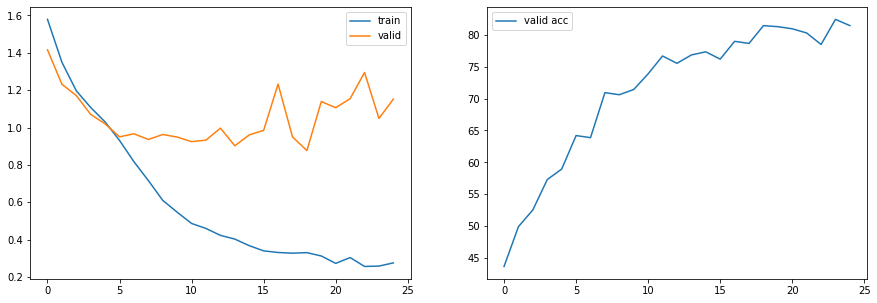

In [7]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
ax1.plot(mean_train_losses, label='train')
ax1.plot(mean_valid_losses, label='valid')
lines, labels = ax1.get_legend_handles_labels()
ax1.legend(lines, labels, loc='best')

ax2.plot(valid_acc_list, label='valid acc')
ax2.legend()

In [8]:
model.eval()
correct = 0
total = 0
with torch.no_grad():
  for i, (images, labels) in enumerate(vald_loader):
    images, labels = images.to(device), labels.to(device)
    outputs = model(images)
    loss = loss_fn(outputs, labels)
    valid_losses.append(loss.item())
            
    _, predicted = torch.max(outputs.data, 1)
    correct += (predicted == labels).sum().item()
    total += labels.size(0)
            
accuracy = 100*correct/total
print (accuracy)

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


81.44499178981937
